<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #F3F781;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Crop Yied <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Crop Yied</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting soil_quality

### I will predict the quality of the soil Because 'crop fields' are almost completely predictable with 'farm_size_hectares'.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix

# For model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/crop-yield-of-a-farm/crop_yield_data.csv')
df.head()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rainfall_mm,3000.0,1263.095000,432.371756,500.0,896.00,1277.0,1636.0,2000.0
soil_quality_index,3000.0,5.506667,2.855172,1.0,3.00,6.0,8.0,10.0
farm_size_hectares,3000.0,498.801000,287.122742,10.0,242.00,505.0,741.0,1000.0
sunlight_hours,3000.0,7.995333,2.621501,4.0,6.00,8.0,10.0,12.0
fertilizer_kg,3000.0,1549.450333,814.326919,100.0,869.75,1542.0,2225.0,3000.0
crop_yield,3000.0,328.099000,145.036503,46.0,199.00,332.0,455.0,628.0


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [5]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
rainfall_mm           0.0
soil_quality_index    0.0
farm_size_hectares    0.0
sunlight_hours        0.0
fertilizer_kg         0.0
crop_yield            0.0
dtype: float64

Duplicate Rows (%):
0.0


In [6]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield


### Outlier does not exist.

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

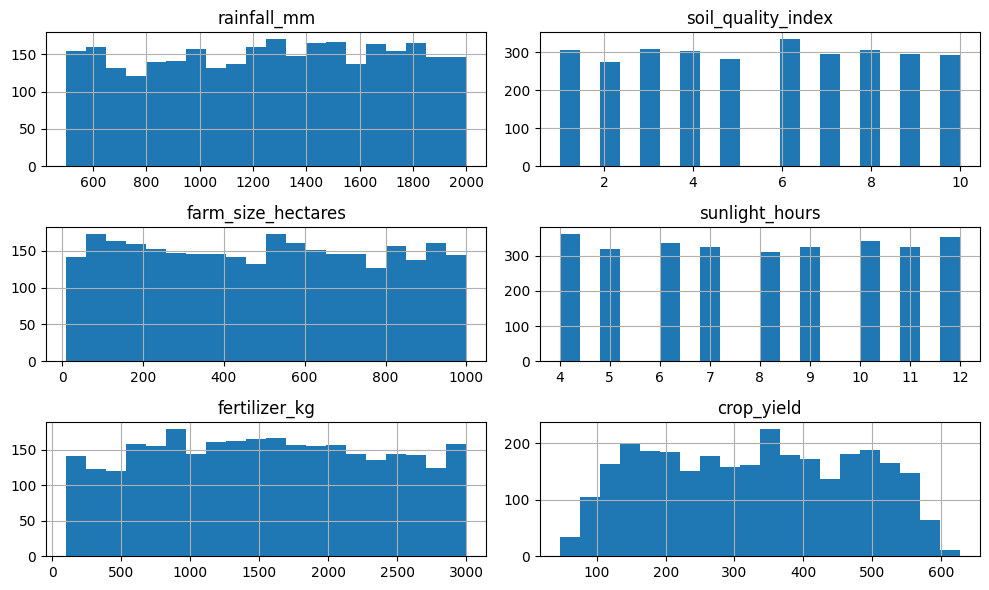

In [7]:
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

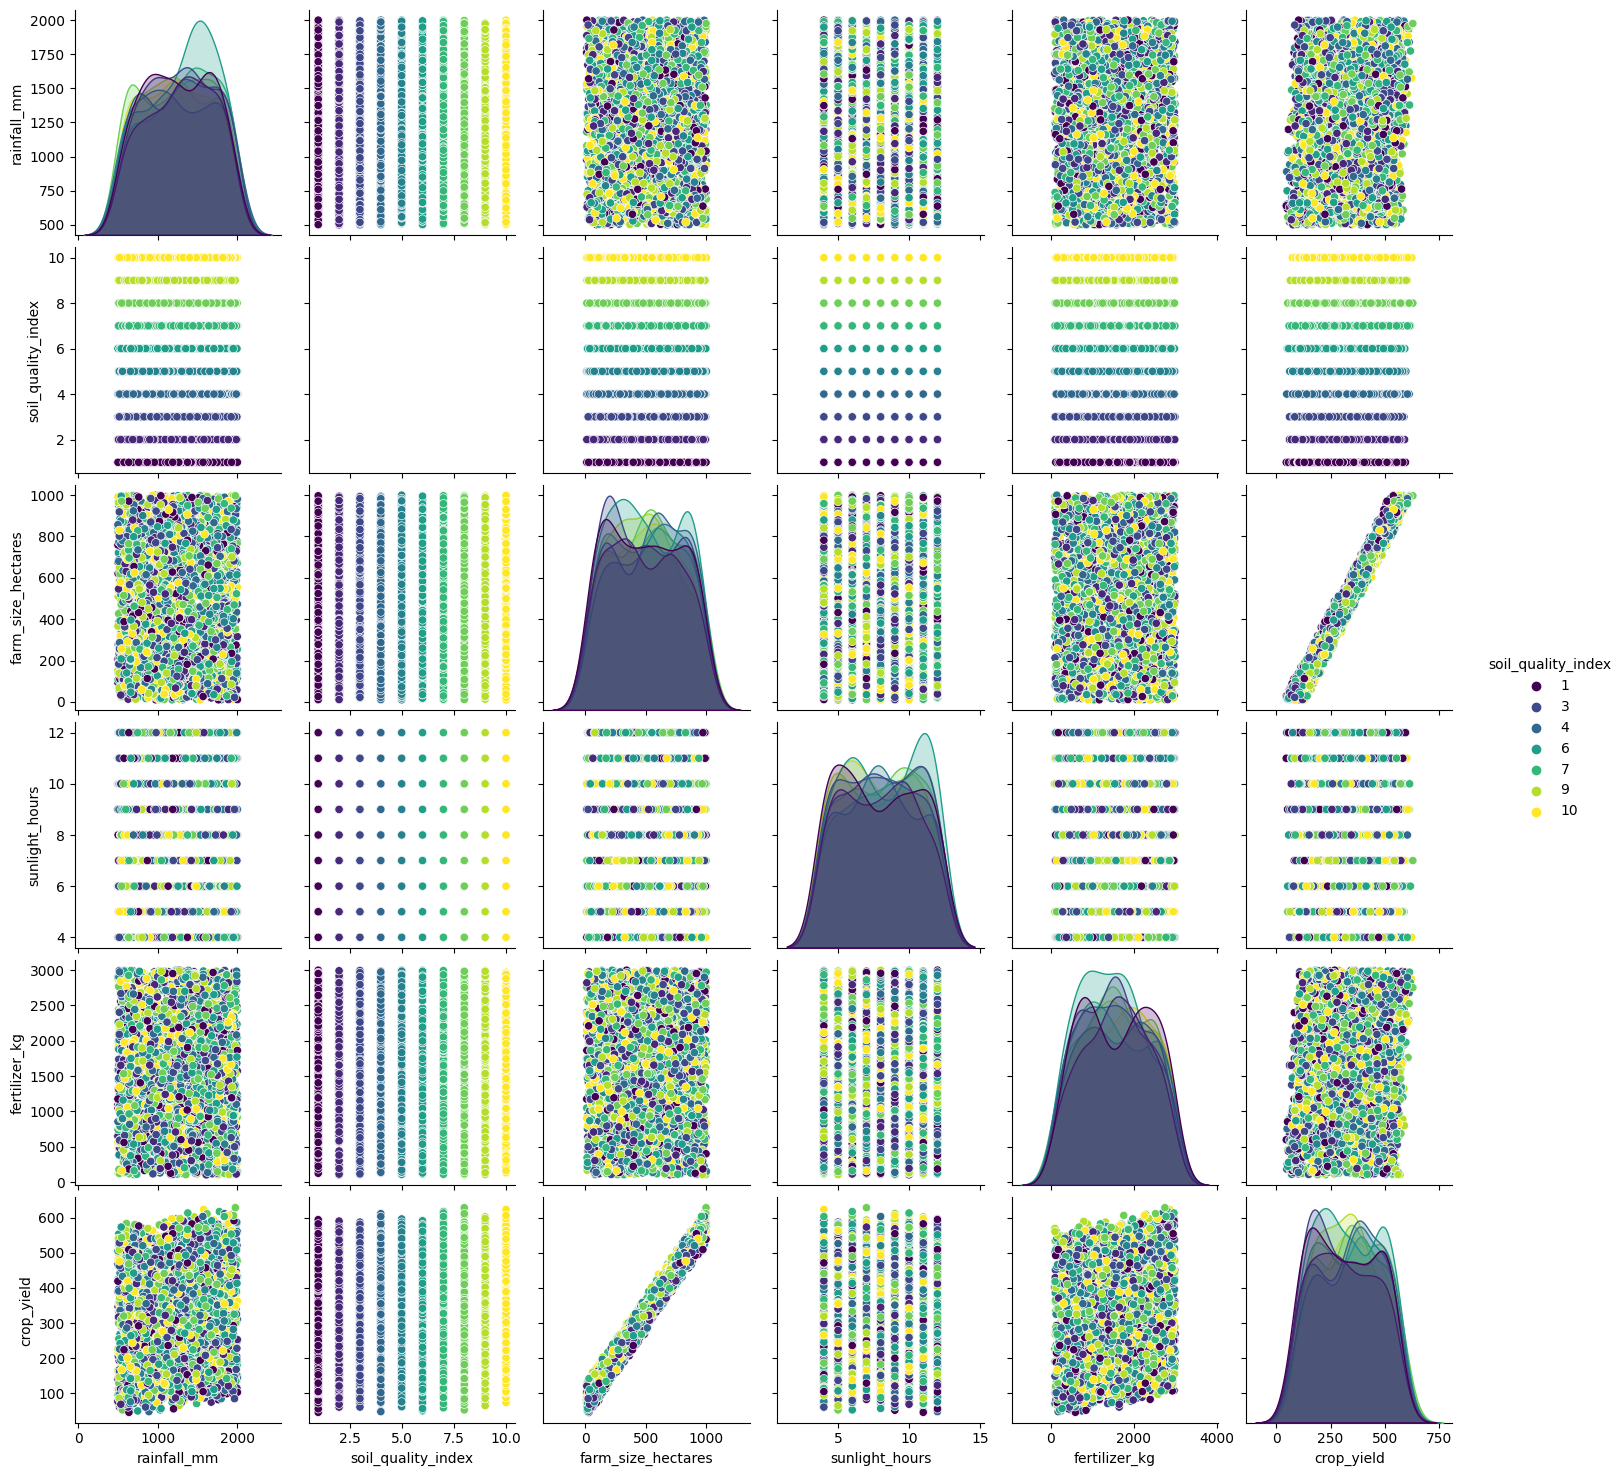

In [8]:
sns.pairplot(
    df,
    vars=["rainfall_mm", "soil_quality_index", "farm_size_hectares", "sunlight_hours", "fertilizer_kg", "crop_yield"],
    hue="soil_quality_index",
    palette="viridis"
)
plt.show()

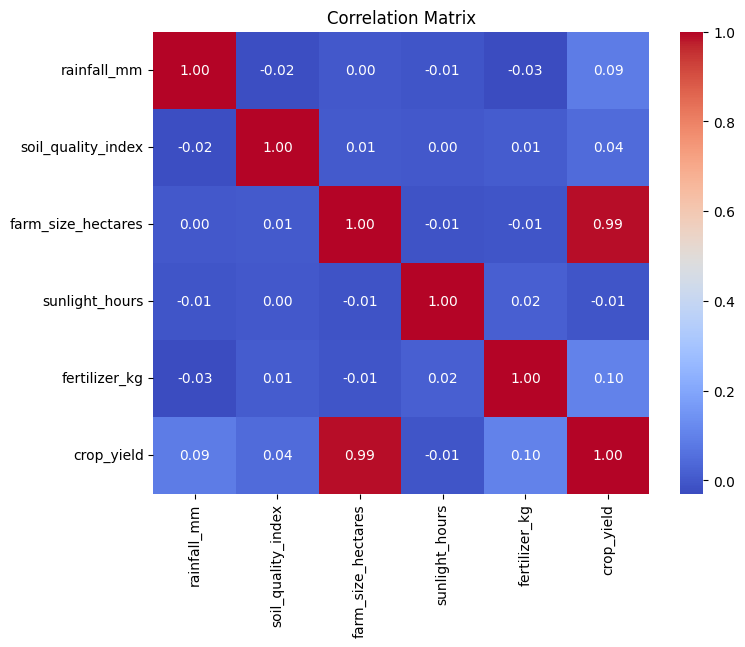

In [9]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of classification model performance</div>

In [10]:
df['soil_quality_index'].unique()

array([ 9,  1,  2,  5,  4, 10,  7,  6,  8,  3])

In [11]:
df['soil_quality_index'] = df['soil_quality_index']- 1
df['soil_quality_index'].unique()

array([8, 0, 1, 4, 3, 9, 6, 5, 7, 2])

In [12]:
X = df.drop('soil_quality_index', axis=1)
y = df['soil_quality_index']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
train_class_distribution = y_train.value_counts(normalize=True) * 100
test_class_distribution = y_test.value_counts(normalize=True) * 100

print("Train (%):")
print(train_class_distribution)

print("\nTest (%):")
print(test_class_distribution)

Train (%):
soil_quality_index
5    11.458333
3    10.375000
7    10.375000
0    10.291667
2     9.958333
9     9.833333
6     9.625000
4     9.416667
1     9.375000
8     9.291667
Name: proportion, dtype: float64

Test (%):
soil_quality_index
8    12.333333
2    11.833333
6    10.666667
5    10.166667
0     9.833333
9     9.333333
7     9.333333
4     9.333333
3     9.000000
1     8.166667
Name: proportion, dtype: float64


In [14]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "SVM": SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return accuracy, precision, recall, f1

In [15]:
results = []

for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.223333,0.174178,0.223333,0.164211
1,SVM,0.113333,0.110392,0.113333,0.098272
2,KNN,0.105000,0.106288,0.105000,0.093124
3,Decision Tree,0.096667,0.095471,0.096667,0.094226
4,Random Forest,0.115000,0.120283,0.115000,0.115790
5,XGBoost,0.150000,0.148658,0.150000,0.147620
6,MLP Classifier,0.843333,0.844093,0.843333,0.842949



Best Model:
Model        MLP Classifier
Accuracy           0.843333
Precision          0.844093
Recall             0.843333
F1-Score           0.842949
Name: 6, dtype: object


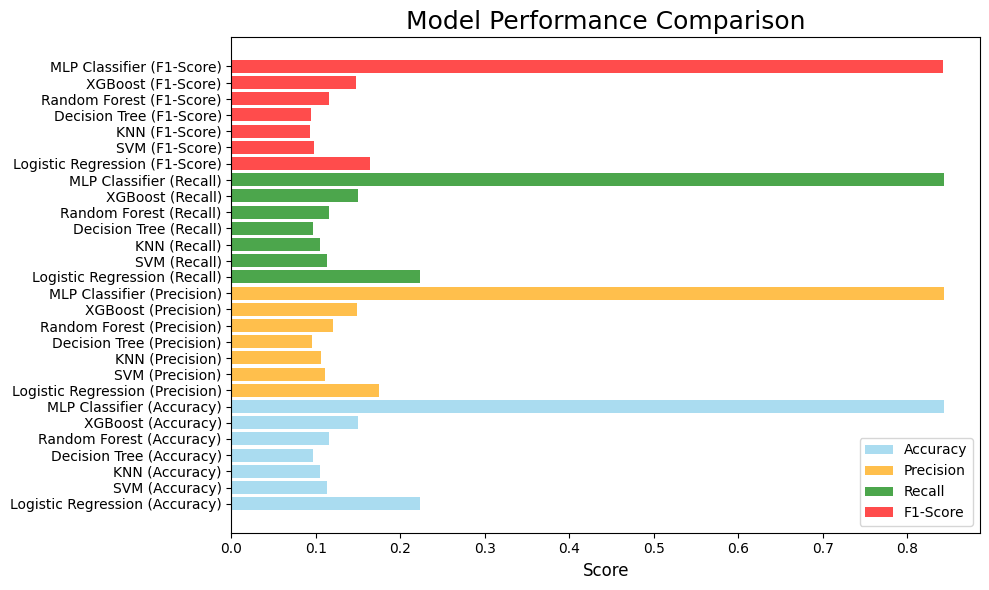


Optimal Model based on Accuracy: MLP Classifier with Accuracy = 0.8433


In [16]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]
print("\nBest Model:")
print(best_model)

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
colors = ["skyblue", "orange", "green", "red"]

fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    ax.barh(results_df['Model'] + f" ({metric})", results_df[metric], color=colors[i], alpha=0.7, label=metric)

ax.set_xlabel("Score", fontsize=12)
ax.set_title("Model Performance Comparison", fontsize=18)
ax.legend()
plt.tight_layout()
plt.show()

print(f"\nOptimal Model based on Accuracy: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


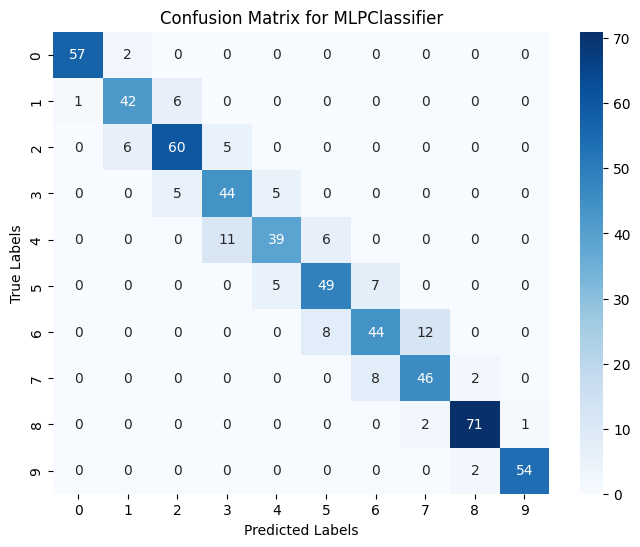

In [17]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

y_pred = mlp_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLPClassifier')
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Modifying MLP Model Structures</div>

In [18]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50), 
    activation='relu',  
    solver='adam',  
    max_iter=1000,  
    learning_rate='adaptive',  
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), learning_rate='adaptive',
              max_iter=1000, random_state=42)

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.75      0.88      0.81        49
           2       0.97      0.80      0.88        71
           3       0.82      0.93      0.87        54
           4       0.76      0.89      0.82        56
           5       0.84      0.77      0.80        61
           6       0.93      0.81      0.87        64
           7       0.73      0.91      0.81        56
           8       0.90      0.77      0.83        74
           9       0.95      0.93      0.94        56

    accuracy                           0.85       600
   macro avg       0.86      0.86      0.85       600
weighted avg       0.86      0.85      0.85       600



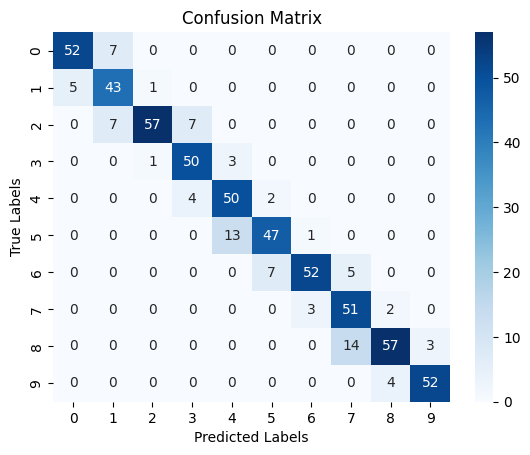

In [19]:
y_pred = mlp_model.predict(X_test_scaled)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Thanks !</div>